# Simple edge detection example

We would like to demonstrate how edges can be detected with convolutional operation. In this notebook, we create a matrix with 0s and 1s (0 represents black and 1 represents white) and use it as the original images. Next, we apply convolutional operation to the image and obtain an edge image. 

In the example below, I create a half white half black image. If the algorithm works, we should detect a vertical edge in the middle of the image. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([1,1,1,0,0,0])
A = np.array([a]*6)
A

array([[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

Let's visualize the original image `A` first. 

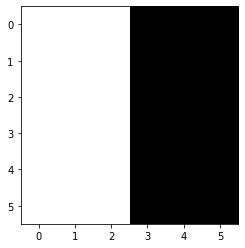

In [3]:
plt.imshow(A, cmap=plt.get_cmap('gray'))

## Vertical Edge Detection 
Here we use a simple vertical filter defined as `vert_filter`. Let's check out the filter as both matrix and image.  

In [4]:
vert_filter = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
vert_filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

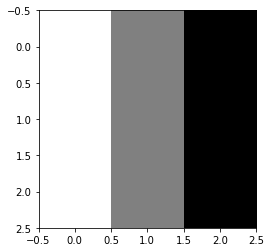

In [5]:
plt.imshow(vert_filter, cmap=plt.get_cmap('gray'))

 In the next step, we create a matrix `new_img` as a place holder for the edge image we are going to get from convolutional operation. 

In [6]:
# get the shape of the edge image
# dimension = dimension of original image - dimension of filter +1
# when there is no padding and stride
new_shape = A.shape[0]-vert_filter.shape[0]+1

In [7]:
new_shape

4

In [8]:
# create new_image
new_img = np.array([0]*(new_shape*new_shape)).reshape(new_shape,new_shape)
# apply convolutional operation
for row in range(0,new_img.shape[0]):
    for col in range(0,new_img.shape[0]):
        new_img[row,col] = np.sum(A[row:row+3, col:col+3]*vert_filter)

Check the edge image `new_img` as a matrix and an image.  

In [9]:
new_img

array([[0, 3, 3, 0],
       [0, 3, 3, 0],
       [0, 3, 3, 0],
       [0, 3, 3, 0]])

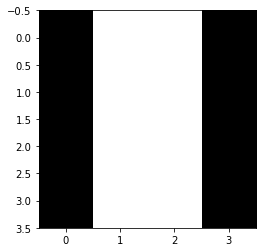

In [10]:
plt.imshow(new_img, cmap=plt.get_cmap('gray'))

From the image shown above, we see white vertical stripe, that is the edge we detected. 

## Horizontal Edge detection 

Let's see another example with horizontal edge detection. Horizontal filter is the transpose of the vertical filter. 

Check horizontal filter as a matrix and an image. 

In [11]:
hori_filter = np.transpose(vert_filter)
hori_filter

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

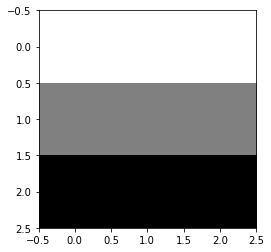

In [12]:
plt.imshow(hori_filter, cmap=plt.get_cmap('gray'))

Create a matrix `B` and use it as original image for horizontal edge detection. 

In [13]:
w = np.array([1,1,1,1,1,1])
b = np.array([0,0,0,0,0,0])
B = np.array([w,w,w,b,b,b])
B.shape

(6, 6)

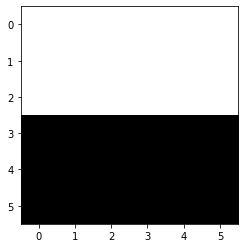

In [14]:
plt.imshow(B, cmap=plt.get_cmap('gray'))

In [15]:
new_shape = B.shape[0]-hori_filter.shape[0]+1
new_img = np.array([0]*(new_shape*new_shape)).reshape(new_shape,new_shape)
for row in range(0,new_img.shape[0]):
    for col in range(0,new_img.shape[0]):
        new_img[row,col] = np.sum(B[row:row+3, col:col+3]*hori_filter)

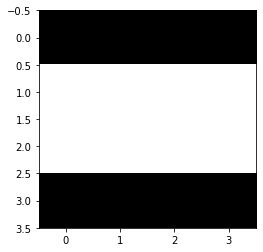

In [16]:
plt.imshow(new_img, cmap=plt.get_cmap('gray'))

In this case, our edge image has a horizontal white stripe that represent the horizontal edge we see on the original image. 

## More complecated image

Let's perform convolutional operation on more complex image. 

**Original image (vertical edge)**

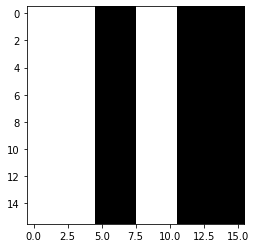

In [17]:
a = [1,1,1,1,1,0,0,0,1,1,1, 0,0,0,0,0]
A = np.array([a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a])
plt.imshow(A, cmap=plt.get_cmap('gray'))

In [18]:
new_shape = A.shape[0]-hori_filter.shape[0]+1
new_img = np.array([0]*(new_shape*new_shape)).reshape(new_shape,new_shape)
for row in range(0,new_img.shape[0]):
    for col in range(0,new_img.shape[0]):
        new_img[row,col] = np.sum(A[row:row+3, col:col+3]*vert_filter)


**Edge image**

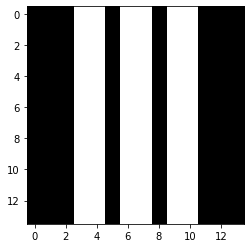

In [19]:
plt.imshow(abs(new_img), cmap=plt.get_cmap('gray'))

**Original image (horizontal edge)**

In [20]:
b = np.array([0]*16)
w = np.array([1]*16)
B = np.array([w,w,w,w,b,b,b,b,w,w,w,w,b,b,b,b])

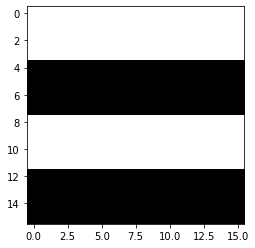

In [21]:
plt.imshow(B, cmap=plt.get_cmap('gray'))

In [22]:
new_shape = B.shape[0]-hori_filter.shape[0]+1
new_img = np.array([0]*(new_shape*new_shape)).reshape(new_shape,new_shape)
for row in range(0,new_img.shape[0]):
    for col in range(0,new_img.shape[0]):
        new_img[row,col] = np.sum(B[row:row+3, col:col+3]*hori_filter)

**Edge image**

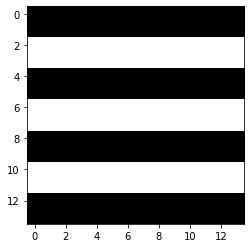

In [23]:
plt.imshow(abs(new_img), cmap=plt.get_cmap('gray'))

**Original image (vertical and horizontal edges)**

In [24]:
b = np.array([0]*16)
w = np.array([1]*16)
v = [1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1]
B = np.array([v,v,v,v,v,b,b,b,b,v,v,v,v,v,v,v])

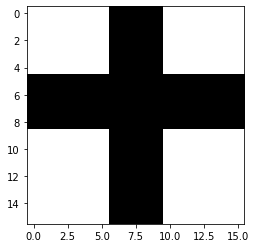

In [25]:
plt.imshow(B, cmap=plt.get_cmap('gray'))

In [26]:
new_shape = B.shape[0]-hori_filter.shape[0]+1
new_img = np.array([0]*(new_shape*new_shape)).reshape(new_shape,new_shape)
for row in range(0,new_img.shape[0]):
    for col in range(0,new_img.shape[0]):
        hor_score = np.sum(B[row:row+3, col:col+3]*hori_filter)
        ver_score = np.sum(B[row:row+3, col:col+3]*vert_filter)
        edge_score = (ver_score**2 + hor_score**2)**.5
        new_img[row,col] = 0 if edge_score ==0 else 1

**Edge image**

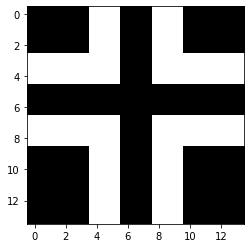

In [27]:
plt.imshow(abs(new_img), cmap=plt.get_cmap('gray'))

In [28]:
new_img

array([[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]])

# Example with a real image 

In [29]:
from PIL import Image


img = plt.imread('simpleIm.png')
#img = Image.open('simpleIm.jpeg').convert('LA')
#get the dimensions of the image
n,m,d = img.shape

In [30]:
img.shape

(480, 480, 4)

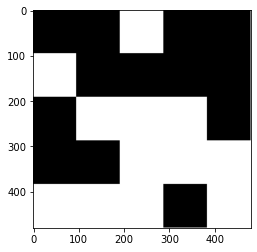

In [31]:
plt.figure()
plt.imshow(img) 
plt.show() 

In [32]:
#initialize the edges image
edges_img = img.copy()


vertical_filter = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
horizontal_filter = np.transpose(vertical_filter)
#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        #edge_score = horizontal_score
        #insert this edge score into the edges image
        
        edges_img[row, col] = [edge_score]*d

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

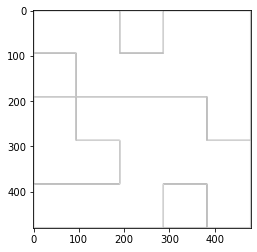

In [33]:
plt.figure()
plt.imshow(edges_img) 
plt.show() 